<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_LSTM_Model_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) LSTM Model Tensorflow

##1. Import dan Load Data


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('/content/ReviewTokoBaju.csv')

##2. Clean Data

In [52]:
df = df[['Review Text', 'Recommended IND']].dropna()

X = df['Review Text'].values
y = df['Recommended IND'].values

##3. Tokenization dan Padding

In [53]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

##4. Split Data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)


##5. Define Model

In [55]:
model_tf = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_tf.build(input_shape=(None, max_length))
model_tf.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

##6. Training

In [56]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model_tf.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, callbacks=[early_stop])



Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 411ms/step - accuracy: 0.8082 - loss: 0.5101 - val_accuracy: 0.8073 - val_loss: 0.4916
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 82s 408ms/step - accuracy: 0.8217 - loss: 0.4754 - val_accuracy: 0.8073 - val_loss: 0.4901
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 47s 416ms/step - accuracy: 0.8219 - loss: 0.4771 - val_accuracy: 0.8073 - val_loss: 0.4903
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 48s 422ms/step - accuracy: 0.8236 - loss: 0.4710 - val_accuracy: 0.8073 - val_loss: 0.4922
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 48s 425ms/step - accuracy: 0.8219 - loss: 0.4752 - val_accuracy: 0.8073 - val_loss: 0.4901


##7. Evaluation


In [57]:
loss, accuracy = model_tf.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8154 - loss: 0.4788

Test Accuracy: 0.8207


##8. Visualization

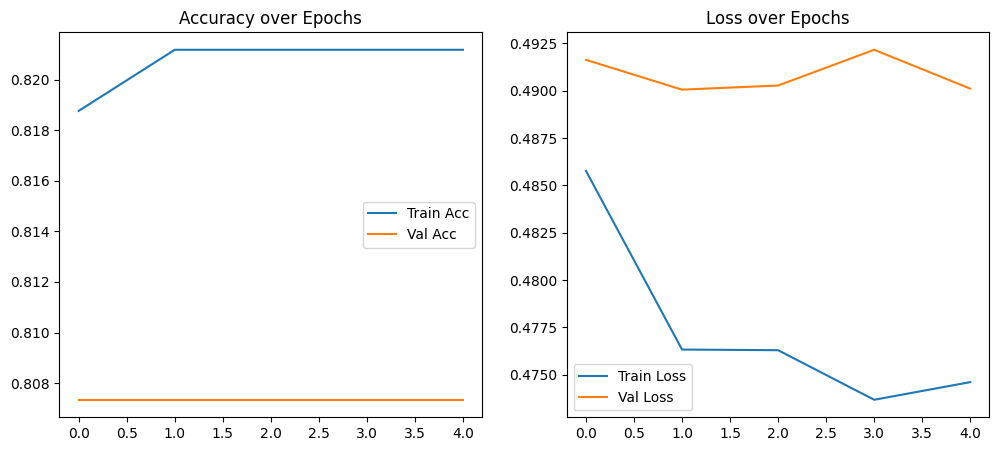

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.legend()
plt.show()

#2) Evaluasi Model Tensorflow

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step
=== Evaluation Metrics ===
Akurasi  : 0.8207109737248841
Presisi  : 0.8207109737248841
Recall   : 1.0
F1-Score : 0.9015280135823429
AUC      : 0.5050014843264405


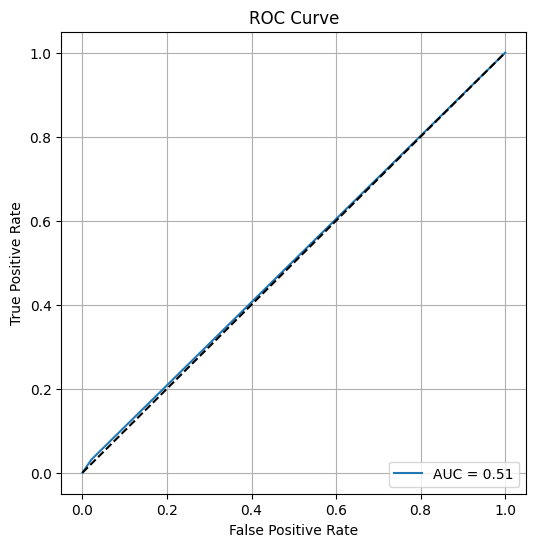

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Prediksi probabilitas dari model TensorFlow
y_pred_proba = model_tf.predict(X_test)

# 2. Ubah probabilitas ke kelas 0 dan 1
y_pred = (y_pred_proba > 0.5).astype("int32")

# 3. Evaluasi metrik
print("=== Evaluation Metrics ===")
print("Akurasi  :", accuracy_score(y_test, y_pred))
print("Presisi  :", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_pred_proba))

# 4. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#3) LSTM Model PyTorch

##1. Import dan Load Data

In [10]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ReviewTokoBaju.csv')
df = df[['Review Text', 'Recommended IND']].dropna()

texts = df['Review Text'].values
labels = df['Recommended IND'].values

##2. Tokenize dan Padding

In [11]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

##3. Pytorch Dataset

In [12]:
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ReviewDataset(X_train, y_train)
test_dataset = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

##4. LSTM Model

In [13]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        x = self.dropout(h_n[-1])
        x = self.fc(x)
        return self.sigmoid(x).squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size=vocab_size, embed_dim=64, hidden_dim=64).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##5. Training Loop


In [14]:
train_losses = []
for epoch in range(5):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.4817
Epoch 2, Loss: 0.4762
Epoch 3, Loss: 0.4763
Epoch 4, Loss: 0.4765
Epoch 5, Loss: 0.4761


#4) Evaluasi Model Pytorch

In [15]:
model.eval()
all_preds = []
all_probs = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        probs = model(X_batch).cpu().numpy()
        all_probs.extend(probs)
        all_preds.extend((probs > 0.5).astype(int))

##1. Metrics

In [16]:
acc = accuracy_score(y_test, all_preds)
prec = precision_score(y_test, all_preds)
rec = recall_score(y_test, all_preds)
f1 = f1_score(y_test, all_preds)
auc = roc_auc_score(y_test, all_probs)

print(f"Akurasi : {acc:.4f}")
print(f"Presisi : {prec:.4f}")
print(f"Recall  : {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC     : {auc:.4f}")

Akurasi : 0.8207
Presisi : 0.8207
Recall  : 1.0000
F1-Score: 0.9015
AUC     : 0.5000


##2. ROC Curve

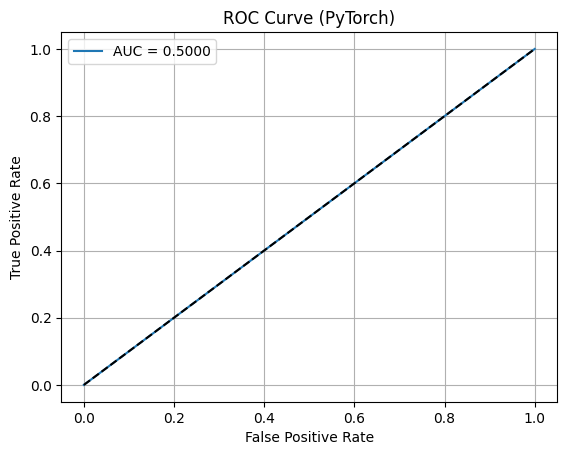

In [17]:
fpr, tpr, _ = roc_curve(y_test, all_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (PyTorch)")
plt.legend()
plt.grid(True)
plt.show()

#5) Persamaan Matematika
##1. Tokenisasi dan Padding
Kode:

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

sequences = tokenizer.texts_to_sequences(X)

padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')
<br><br>
Setiap kalimat X diubah menjadi urutan indeks token berdasarkan frekuensi. Misalnya:
"baju bagus dan nyaman" → [23, 12, 45, 67].

Padding dilakukan agar semua input punya panjang sama (maxlen = 200), misalnya:padded_sequence=[23,12,45,67,0,0,...,0]$∈R^{200}$<br><br>

##2. Embedding Layer
Kode:

Embedding(vocab_size, 64, input_length=max_length)
<br><br>
Persamaan Matematika: Embedding layer memetakan setiap token x_i menjadi vektor berdimensi d=64:

$$
Embedding : x_i → e_i \in R^{64}
$$

Jika Input berupa urutan X = [x_1, x_2, ..., x_{200}], maka outputnya:

$$
E = [e_1, e_2, ..., e_{200}] \in R^{200x\times64}
$$
<br><br>

##3. LSTM Layer
Kode:

LSTM(64)

Persamaan Matematika: LSTM (Long Short-Term Memory) mengolah input sekuensial dengan memori internal: Untuk setiap waktu t:

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] +b_i)
$$
$$
\overline{C}_t = tanh (W_C \cdot [h_{t-1}, x_t] + b_c)
$$
$$
C_t = f_t * C_{t-1}+i_t*\overline{C}_t
$$
$$
o_t = \sigma (W_o ⋅ [h_{t-1}, x_t] +b_o)
$$
$$
h_t = o_t * tanh(C_t)
$$

Keterangan:
- $f_t$ = forget gate
- $i_t$ = input gat
- $c_t$ = cell gate
- $h_t$ = hidden state
- $\sigma$ = sigmoid activation
- $*$ =  elemen-wise multiplilcation

##4. Dense Layer & Activation
Kode:

Dense(32, activation='relu')

Dense(1, activation='sigmoid')
<br><br>
Hidden Layer (ReLU):

$$
h = ReLU(W_1x+b_1)=max(0,W_1x+b_1)
$$

Output Layer (Sigmoid):
$$
\hat{y}=\sigma(W_2h+b_2)=\frac{1}{1+e^{-(W_2h+b_2)}}
$$<br><br>

##5. Loss Function: Binary Crossentropy
Kode:

loss='binary_crossentropy'
Persamaan Matematika: Untuk label y ∈ {0,1} dan prediksi probabilitas $\hat{y}$:
$$
𝓛_{BCE}(y,\hat{y})=-[y \cdot log(\hat{y})+(1-y) \cdot log(1-\hat{y})]
$$<br><br>

##6. Optimizer: Adam
Kode:

optimizer='adam'

Persamaan Matematika (Adam): Adam gabungan dari Momentum dan RMSProp:
$$
m_t = \beta m_t + (1-\beta_1) ∇L(\theta)
$$
$$
v_t = \beta_2v_{t-1} +(1-\beta_1) (∇L(\theta))^2
$$
$$
\hat{m}_t = \frac{m_t}{1-\beta_{1}^{t}}, \hat{v}_t = \frac{v_t}{1-\beta_{2}^{t}}
$$<br><br>

##7. Evaluasi
Kode:

model.evaluate(X_test, y_test)
<br><br>
Metode Evaluasi: Akurasi
$$
Accuracy = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Data}}
$$

Jika prediksi = [1, 0, 1, 1] dan label = [1, 0, 0, 1], maka:
$$
Accuracy = \frac{3}{4} = 0.75
$$

##8. Akurasi
Mengukur seberapa banyak prediksi yang benar dibandingkan total data:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$<br><br>

Di mana:
- $TP (True Positive)$ = Kasus positif yang diprediksi positif
- $TF (True Negative)$ = Kasus negatif yang diprediksi negatif
- $FP (False Positive)$ = Kasus negatif yang salah diprediksi sebagai positif
- $FF (False Negative)$ = Kasus positif yang salah diprediksi sebagai negatif<br><br>

##9. Presisi
$$
Presisi = \frac{TP}{TP + FP}
$$<br><br>

Keterangan:
 - Mengukur seberapa banyak dari yang model prediksi positif, benar-benar positif.
 - Tinggi = sedikit yang salah prediksi sebagai positif.

Cocok saat kamu ingin menghindari false positive, misalnya dalam deteksi spam.<br><br>

##10. Recall (Sensitivity / TPR)
$$
Recall = \frac{TP}{TP + FN}
$$<br><br>

Keterangan:
- Mengukur seberapa banyak dari yang sebenarnya positif, berhasil dideteksi oleh model.
- Tinggi = model jarang melewatkan yang seharusnya positif.

Cocok saat kamu ingin menghindari false negative, misalnya pada deteksi penyakit.<br><br>

##11. F1-Score
$$
F1-Score = 2 \times \frac{Precision×Recall}{Precision+Recall}
$$<br><br>

Keterangan:
- F1 adalah rata-rata harmonis antara presisi dan recall.
- Cocok jika kamu ingin seimbang antara menghindari FP dan FN.

Digunakan saat kamu punya data imbalance dan ingin metrik yang fair.<br><br>

##12. AUC - Area Under Curve (ROC)
ROC Curve adalah grafik antara:
- True Positive Rate (TPR) = Recall
- False Positive Rate (FPR):
<br><br>
$$
FPR = \frac{FP}{FP + TN}
$$
<br><br>
Semakin tinggi AUC, semakin baik model membedakan antara kelas 1 dan kelas 0.
Nilai AUC:
- 0.5 = tebak-tebakan
- 0.7 - 0.8 = oke
- 0.8 - 0.9 = bagus
- 0.9 = sangat bagus